<a href="https://colab.research.google.com/github/NguyenPhuongDng/Stock-Price-Prediction/blob/main/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd

### Đọc file (Không sửa chỗ này) (Dữ liệu ở trên github)

In [131]:
df = pd.read_csv('fpt_lsg.csv')

In [132]:
df

,Ngày,Giá đóng cửa,Giá điều chỉnh,Thay đổi,KL gd khớp lệnh,GT gd khớp lệnh,KL gd thỏa thuận,GT gd thỏa thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,2025-05-08,114.3,NaN,4.6(4.19 %),12644900,1417.70,0,0.00,110.4,114.6,109.0
1,2025-05-07,109.7,NaN,0(0.00 %),3926800,431.12,452500,49.50,109.6,111.2,108.9
2,2025-05-06,109.7,NaN,1.1(1.01 %),5686200,626.04,1045000,116.19,108.6,111.0,108.6
3,2025-05-05,108.6,NaN,-0.8(-0.73 %),7167600,773.26,452500,49.50,109.5,109.7,106.9
4,2025-04-29,109.4,NaN,-0.1(-0.09 %),2945500,322.61,3264400,367.59,109.6,110.5,109.1
...,...,...,...,...,...,...,...,...,...,...,...
4577,2006-12-19,486.0,13.90,23(4.97 %),137520,0.07,0,0.00,486.0,486.0,486.0
4578,2006-12-18,463.0,13.24,22(4.99 %),215790,0.10,10000,0.00,463.0,463.0,463.0
4579,2006-12-15,441.0,12.61,21(5.00 %),265300,0.12,30000,0.01,441.0,441.0,441.0
4580,2006-12-14,420.0,12.01,20(5.00 %),280710,0.12,96000,0.04,420.0,420.0,420.0


In [133]:
df = df[['Ngày', 'Giá đóng cửa']]

In [134]:
df.head()

,Ngày,Giá đóng cửa
0,2025-05-08,114.3
1,2025-05-07,109.7
2,2025-05-06,109.7
3,2025-05-05,108.6
4,2025-04-29,109.4


BỎ nan

In [135]:
nan_counts = df.isna().sum()
print(nan_counts)
df = df.dropna()

Ngày            0
Giá đóng cửa    0
dtype: int64


Chuyển ngày thành dạng object và soft từ dưới lên

In [136]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [137]:
df['Ngày'] = df['Ngày'].apply(str_to_datetime)

In [138]:
df.index = df.pop('Ngày')

In [139]:
df = df.sort_index()

print(df.index.is_monotonic_increasing)


True


In [140]:
df.head()

,Giá đóng cửa
Ngày,
2006-12-13,400.0
2006-12-14,420.0
2006-12-15,441.0
2006-12-18,463.0
2006-12-19,486.0


visualize thô

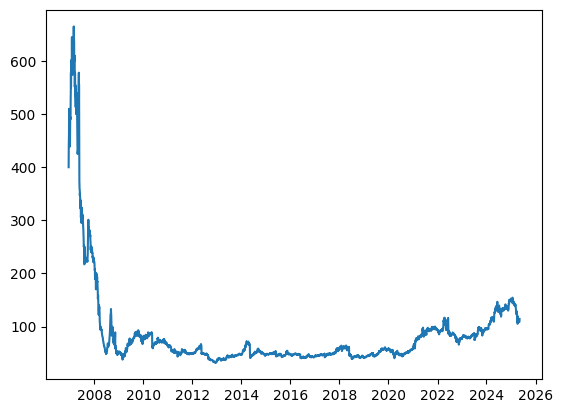

In [141]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Giá đóng cửa'])

### tính đặc trưng (Làm ở đây)

In [142]:
# Feature1: Simple Moving Average (SMA)
df['SMA_20'] = df['Giá đóng cửa'].rolling(window=20).mean()

In [143]:
# Feature2: Exponential Moving Average (EMA) 20
df['EMA_20'] = df['Giá đóng cửa'].ewm(span=20, adjust=False).mean()

In [145]:
# Feature3: MACD line & signal
ema12 = df['Giá đóng cửa'].ewm(span=12, adjust=False).mean()
ema26 = df['Giá đóng cửa'].ewm(span=26, adjust=False).mean()
df['MACD']        = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
# Histogram
df['MACD_hist']   = df['MACD'] - df['MACD_signal']

In [166]:
# Feature4: RSI
delta = df['Giá đóng cửa'].diff()

# Phân tách tăng/giảm
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Tính trung bình lũy thừa (EMA) của gain/loss
window = 14
avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

# Tính RS (Relative Strength)
rs = avg_gain / avg_loss

# Tính RSI
df['RSI_14'] = 100 - (100 / (1 + rs))

In [167]:
df.head()

,Giá đóng cửa,SMA_20,EMA_20,MACD,MACD_signal,MACD_hist,RSI_14
Ngày,,,,,,,
2006-12-13,400.0,0.0,400.000000,0.000000,0.000000,0.000000,NaN
2006-12-14,420.0,0.0,401.904762,1.595442,0.319088,1.276353,NaN
2006-12-15,441.0,0.0,405.628118,4.502463,1.155763,3.346700,NaN
2006-12-18,463.0,0.0,411.092107,8.483720,2.621355,5.862366,NaN
2006-12-19,486.0,0.0,418.226192,13.341016,4.765287,8.575729,NaN


,Giá đóng cửa,SMA_20,EMA_20,MACD,MACD_signal,MACD_hist,RSI_14
Ngày,,,,,,,
2006-12-13,400.0,0.000,400.000000,0.000000,0.000000,0.000000,0.000000
2006-12-14,420.0,0.000,401.904762,1.595442,0.319088,1.276353,0.000000
2006-12-15,441.0,0.000,405.628118,4.502463,1.155763,3.346700,0.000000
2006-12-18,463.0,0.000,411.092107,8.483720,2.621355,5.862366,0.000000
2006-12-19,486.0,0.000,418.226192,13.341016,4.765287,8.575729,0.000000
...,...,...,...,...,...,...,...
2025-04-29,109.4,112.485,114.099460,-4.391290,-5.040387,0.649098,56.047198
2025-05-05,108.6,111.890,113.575702,-4.315617,-4.895433,0.579816,42.700730
2025-05-06,109.7,111.275,113.206588,-4.119399,-4.740226,0.620827,30.530973


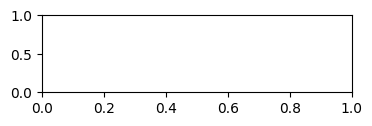

In [168]:
# Giả sử bạn đã có df với các cột Close, Pct_Change,… chứa NaN
# Cách 1: Thay NaN cho toàn bộ DataFrame
df = df.fillna(0)
df


In [156]:
# from sklearn.preprocessing import MinMaxScaler

# features = ['Giá đóng cửa','SMA_20','EMA_20','MACD','MACD_signal','MACD_hist']

# scaler = MinMaxScaler(feature_range=(0,1))
# df_scaled = df.copy()

# # chỉ scale cột features, giữ nguyên index
# df_scaled[features] = scaler.fit_transform(df[features])

# # bây giờ tất cả các feature đều nằm trong [0,1]


### Visualize

In [161]:
corr = df_scaled.corr()
print(corr)

              Giá đóng cửa    SMA_20    EMA_20      MACD  MACD_signal  \
Giá đóng cửa      1.000000  0.925763  0.993100  0.016809     0.028489   
SMA_20            0.925763  1.000000  0.942899 -0.147639    -0.101782   
EMA_20            0.993100  0.942899  1.000000 -0.078592    -0.050491   
MACD              0.016809 -0.147639 -0.078592  1.000000     0.967346   
MACD_signal       0.028489 -0.101782 -0.050491  0.967346     1.000000   
MACD_hist        -0.041421 -0.197378 -0.119022  0.286152     0.033945   

              MACD_hist  
Giá đóng cửa  -0.041421  
SMA_20        -0.197378  
EMA_20        -0.119022  
MACD           0.286152  
MACD_signal    0.033945  
MACD_hist      1.000000  


In [177]:
df_new = df[4000:]

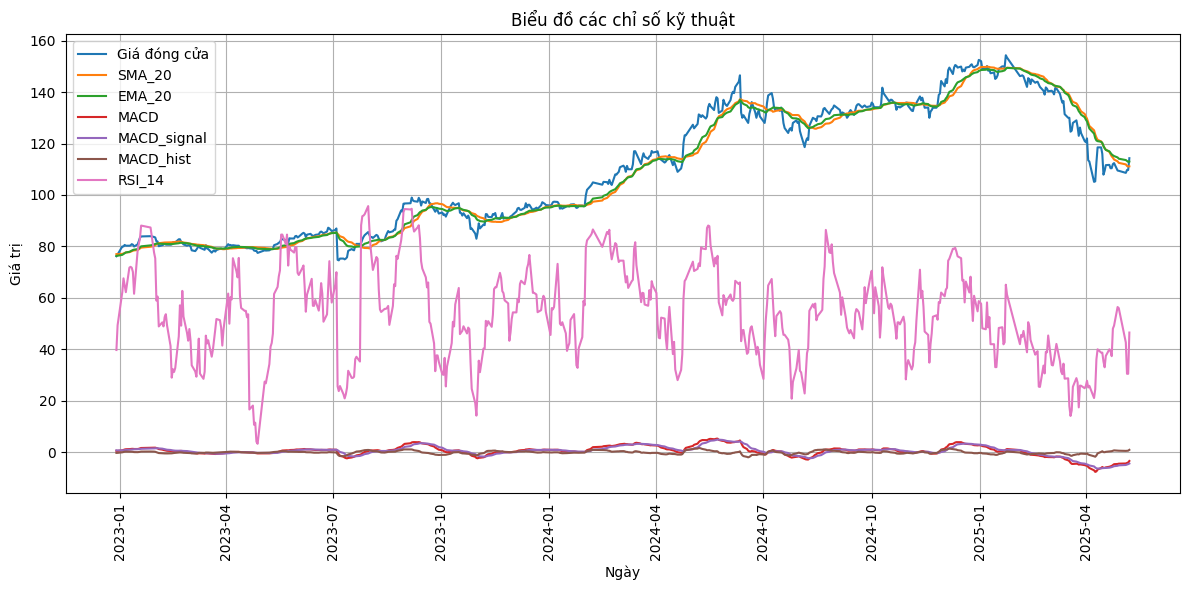

In [179]:
plt.figure(figsize=(12, 6))

plt.plot(df_new.index, df_new['Giá đóng cửa'], label='Giá đóng cửa')
plt.plot(df_new.index, df_new['SMA_20'], label='SMA_20')
plt.plot(df_new.index, df_new['EMA_20'], label='EMA_20')
plt.plot(df_new.index, df_new['MACD'], label='MACD')
plt.plot(df_new.index, df_new['MACD_signal'], label='MACD_signal')
plt.plot(df_new.index, df_new['MACD_hist'], label='MACD_hist')
plt.plot(df_new.index, df_new['RSI_14'], label='RSI_14')

plt.legend()
plt.title("Biểu đồ các chỉ số kỹ thuật")
plt.xlabel("Ngày")
plt.ylabel("Giá trị")
plt.xticks(rotation=90)  # 👉 Xoay ngày theo chiều dọc
plt.tight_layout()
plt.grid(True)
plt.show()


### Save file

In [170]:
# Giữ index (Date) và ghi nhãn cột index là “Date”
df.to_csv('add_features.csv', index=True, index_label='Date', encoding='utf-8')
